## GT Sampler

In [6]:
import sys
sys.path.append("..")

from models.utils_for_toy_rdm import initilize_rep_sampler_toy
from omegaconf import OmegaConf
import torch
device = "cuda:1"
batch_size = 10000

In [7]:
sampler = "GtSampler"
Gt_dataset = "train"
encoder_path = "./checkpoints/encoder_ckpts/QM9_diffusion_finetune_l3_nf128.ckpt"
encoder_config_path = "./configs/frad_encoder.yaml"

dataset_config_path = "./configs/qm9_gen_config.yaml" # Contained in it.
dataset_args = OmegaConf.load(dataset_config_path).gen_args
dataset_args.world_size = 1
dataset_args.rank = 0

rep_sampler_args = {
    "sampler": sampler,
    "Gt_dataset": Gt_dataset,
    "encoder_path": encoder_path,
    "encoder_config_path": encoder_config_path,
}
rep_sampler_args = OmegaConf.create(rep_sampler_args)

gtsampler = initilize_rep_sampler_toy(rep_sampler_args, device, dataset_args=dataset_args)

Using <class 'utils_for_toy_rdm.GtSampler_toy'> for REP Sampling!


In [17]:
sampler = "PCSampler"
rdm_ckpt = "/home/lizian/Self-Conditioned-3D-Diffusion/outputs/rdm/debug/model/checkpoint-last.pth"
inv_temp = 5.0
n_steps = 1

rep_sampler_args = {
    "sampler": sampler,
    "rdm_ckpt": rdm_ckpt,
    "inv_temp": inv_temp,
    "n_steps": n_steps,
}
rep_sampler_args = OmegaConf.create(rep_sampler_args)

pcsampler = initilize_rep_sampler_toy(rep_sampler_args, device, dataset_args=dataset_args)

Loading RDM from /home/lizian/Self-Conditioned-3D-Diffusion/outputs/rdm/debug/model/checkpoint-last.pth
RDM_toy: Running in x0-prediction mode
DiffusionWrapper has 0.21 M params.
Using <class 'utils_for_toy_rdm.PCSampler_toy'> for REP Sampling!
Different in betas when initializing VPSDE! We use betas in the trained model.


In [18]:
print("Sampling GT Reps...")
gt_nodesxsample = torch.ones((batch_size,), dtype=torch.long, device=device)
gt_reps = gtsampler.sample(
    device=device,
    nodesxsample=gt_nodesxsample,
    additional_cond=None,
    running_batch_size=1000,
)
gt_y = torch.zeros((gt_reps.shape[0]), device=device)
print("Finished Sampling GT Reps.")

print("Sampling PC Reps...")
pc_nodesxsample = torch.ones((batch_size,), dtype=torch.long, device=device)
pc_reps = pcsampler.sample(
    device=device,
    nodesxsample=pc_nodesxsample,
    additional_cond=None,
    running_batch_size=10000,
)
pc_y = torch.ones((pc_reps.shape[0]), device=device)
print("Finished Sampling PC Reps.")


Sampling GT Reps...


100%|██████████| 10/10 [00:02<00:00,  4.10it/s]


Finished Sampling GT Reps.
Sampling PC Reps...


100%|██████████| 1/1 [00:05<00:00,  5.71s/it]

Finished Sampling PC Reps.


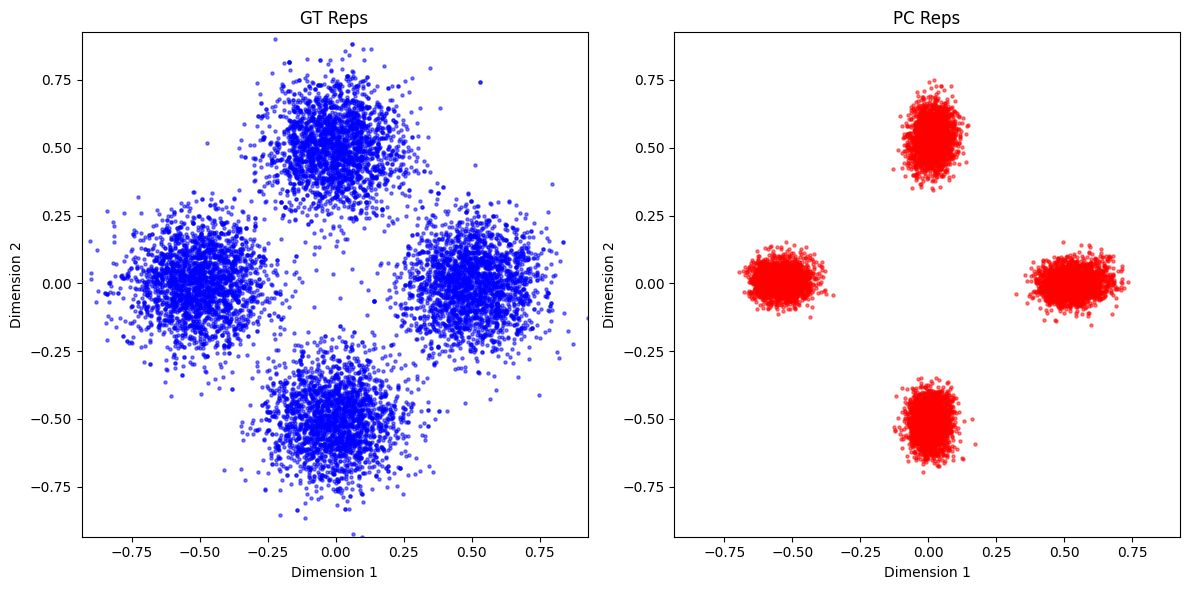

In [19]:
import matplotlib.pyplot as plt

# Assuming gt_reps and pc_reps have been sampled as per your code snippet
# And they are 2D representations

# Convert the tensors to CPU and numpy arrays for visualization
gt_reps_cpu = gt_reps.cpu().numpy()
pc_reps_cpu = pc_reps.cpu().numpy()

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot GT Reps
axs[0].scatter(gt_reps_cpu[:, 0], gt_reps_cpu[:, 1], c='blue', alpha=0.5, s=5)
axs[0].set_title("GT Reps")
axs[0].set_xlabel("Dimension 1")
axs[0].set_ylabel("Dimension 2")

# Plot PC Reps
axs[1].scatter(pc_reps_cpu[:, 0], pc_reps_cpu[:, 1], c='red', alpha=0.5, s=5)
axs[1].set_title("PC Reps")
axs[1].set_xlabel("Dimension 1")
axs[1].set_ylabel("Dimension 2")

# Set the same limits for both subplots for better comparison
min_limit = min(gt_reps_cpu.min(), pc_reps_cpu.min())
max_limit = max(gt_reps_cpu.max(), pc_reps_cpu.max())
for ax in axs:
    ax.set_xlim([min_limit, max_limit])
    ax.set_ylim([min_limit, max_limit])

# Show the plot
plt.tight_layout()
plt.show()